<span >Лабораторна робота №6</span><br>
<span >студента групи МІТ-31</span><br>
<span >Ярощук Назара Юрійовича</span><br>

<span >Task1 - Виконати вирішення задач класифікації для 3 класів з набору даних food101.</span><br>
<span >Task2 - Індекси класів визначити індивідуально за залежностями: i1=19,i2=49,i3=79 (де і1,і2,і3 - індекс класу (починаючи з 0) у відсортованому за алфавітом наборі даних, n - номер за списком (обчислені значення індексів вказані у даному документі у стовпчиках D:F)).</span><br>
<span>Task3 - Отримані результати викласти на github у репозиторій ml2021 в основну (default) гілку в папці Lab6.</span>

<span>Task2 - За номером варіанту мені дісталися класи 20 - chicken_wings, 50 - grilled_salmon, 80 - pulled_pork_sandwich.</span><br>

In [59]:
import zipfile

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("food.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [60]:
import os

main_dir="food"

In [61]:
for dirpath, dirnames, filenames in os.walk(main_dir):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'food'.
There are 3 directories and 0 images in 'food\test'.
There are 0 directories and 250 images in 'food\test\chicken_wings'.
There are 0 directories and 250 images in 'food\test\grilled_salmon'.
There are 0 directories and 250 images in 'food\test\pulled_pork_sandwich'.
There are 3 directories and 0 images in 'food\train'.
There are 0 directories and 75 images in 'food\train\chicken_wings'.
There are 0 directories and 75 images in 'food\train\grilled_salmon'.
There are 0 directories and 75 images in 'food\train\pulled_pork_sandwich'.


In [62]:
import pathlib
import numpy as np
data_dir = pathlib.Path("food/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['chicken_wings' 'grilled_salmon' 'pulled_pork_sandwich']


In [63]:
train_dir = "food/train/"
test_dir = "food/test/"

In [64]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img


Image shape: (512, 512, 3)


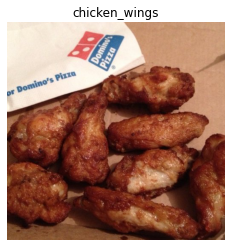

In [65]:
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

In [66]:
# Setup data inputs
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "food/train/"
test_dir = "food/test/"


train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="sparse")


test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode="sparse")

model_food = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="softmax")
])

# Compile the model
model_food.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_food.fit(train_data,
                        epochs=2,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Found 225 images belonging to 3 classes.
Found 750 images belonging to 3 classes.
Epoch 1/2
8/8 [==============================] - 34s 4s/step - loss: 0.3833 - accuracy: 0.3333 - val_loss: 0.0187 - val_accuracy: 0.3333
Epoch 2/2
8/8 [==============================] - 23s 3s/step - loss: -0.0125 - accuracy: 0.3333 - val_loss: -0.2290 - val_accuracy: 0.3333


In [67]:
model_food.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_25 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_27 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

<AxesSubplot:title={'center':'History ins_model'}, xlabel='epochs', ylabel='loss'>

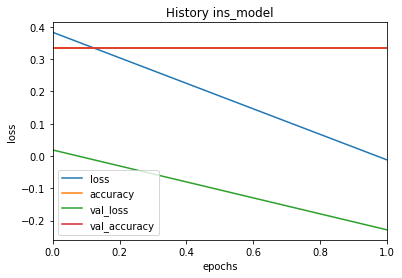

In [68]:
import pandas as pd
pd.DataFrame(history_1.history).plot(xlabel="epochs", 
ylabel="loss",title="History ins_model", xlim=(0,1))

In [69]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

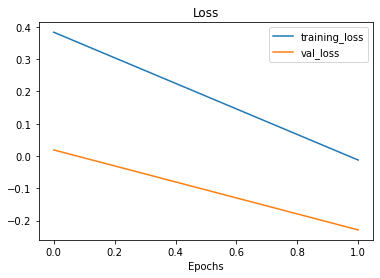

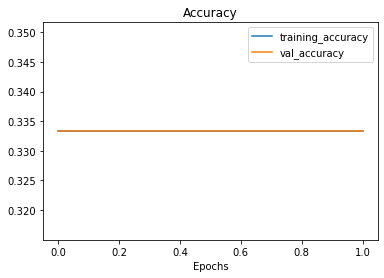

In [70]:
plot_loss_curves(history_1)

In [71]:
model_food.save('modelfood.h5')